<a href="https://colab.research.google.com/github/beyounding/data_processing/blob/main/eeg_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing

In [ ]:
!pip install mne
!pip install PyQt5

In [ ]:
import os
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PyQt5
from scipy.io import savemat
from mne.preprocessing import ICA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/EEG_results_video"

listFiles = os.listdir(path)

Creating events

In [ ]:
#time_periods = [('0:25:00', '0:25:10'), ('0:31:13', '0:31:21'), ('0:45:18', '0:46:09'), ('0:52:05', '0:52:14'),
                ('0:56:18', '0:57:09'), ('1:08:16', '1:09:04'), ('1:17:13', '1:18:03'), ('1:21:12', '1:21:21'),
                ('1:25:09', '1:25:18'), ('1:33:00', '1:33:16'), ('1:37:10', '1:37:22'), ('1:41:02', '1:41:12'),
                ('1:52:13', '1:53:09'), ('2:00:03', '2:01:02'), ('2:08:20', '2:09:07'), ('2:17:13', '2:18:04'),
                ('2:20:05', '2:20:13'), ('2:21:01', '2:21:14'), ('2:26:07', '2:26:24'), ('2:32:13', '2:33:03'),
                ('2:34:12', '2:35:02'), ('2:37:01', '2:37:19'), ('2:41:03', '2:41:10'), ('2:44:07', '2:44:18'),
                ('2:49:06', '2:49:20'), ('2:51:12', '2:52:09'), ('3:02:02', '3:02:14'), ('3:06:07', '3:06:23'),
                ('3:13:20', '3:14:07'), ('3:21:12', '3:22:00'), ('3:25:10', '3:25:19'), ('3:28:02', '3:28:17'),
                ('3:31:21', '3:32:14'), ('3:35:03', '3:35:19'), ('3:39:18', '3:40:05'), ('3:44:22', '3:45:03'),
                ('3:51:15', '3:52:07'), ('3:54:21', '3:55:14'), ('4:01:00', '4:01:16'), ('4:06:00', '4:07:01'),
                ('4:15:08', '4:15:19'), ('4:22:05', '4:23:02'), ('4:26:06', '4:26:19'), ('4:29:19', '4:30:19'),
                ('4:43:11', '4:44:06'), ('4:48:06', '4:48:17'), ('4:51:20', '4:52:09'), ('4:57:12', '4:58:09')]

In [ ]:
#time_periods2 = [('0:24:00', '0:24:10'), ('0:30:13', '0:30:21'), ('0:44:18', '0:45:09'), ('0:51:05', '0:51:14'),
                ('0:55:18', '0:56:09'), ('1:07:16', '1:08:04'), ('1:16:13', '1:17:03'), ('1:20:12', '1:20:21'),
                ('1:24:09', '1:24:18'), ('1:32:00', '1:32:16'), ('1:36:10', '1:36:22'), ('1:40:02', '1:40:12'),
                ('1:51:13', '1:52:09'), ('1:53:03', '1:53:02'), ('2:07:20', '2:08:07'), ('2:16:13', '2:17:04'),
                ('2:19:05', '2:19:13'), ('2:20:01', '2:20:14'), ('2:25:07', '2:25:24'), ('2:31:13', '2:32:03'),
                ('2:33:12', '2:34:02'), ('2:36:01', '2:36:19'), ('2:40:03', '2:40:10'), ('2:43:07', '2:43:18'),
                ('2:48:06', '2:48:20'), ('2:50:12', '2:51:09'), ('3:01:02', '3:01:14'), ('3:05:07', '3:05:23'),
                ('3:12:20', '3:13:07'), ('3:20:12', '3:21:00'), ('3:24:10', '3:24:19'), ('3:27:02', '3:27:17'),
                ('3:30:21', '3:31:14'), ('3:34:03', '3:34:19'), ('3:38:18', '3:39:05'), ('3:43:22', '3:44:03'),
                ('3:50:15', '3:51:07'), ('3:53:21', '3:54:14'), ('4:00:00', '4:00:16'), ('4:05:00', '4:06:01'),
                ('4:14:08', '4:14:19'), ('4:21:05', '4:22:02'), ('4:25:06', '4:25:19'), ('4:28:19', '4:29:19'),
                ('4:42:11', '4:43:06'), ('4:47:06', '4:47:17'), ('4:50:20', '4:51:09'), ('4:56:12', '4:57:09')]

In [ ]:
time_periods3 = [('0:00:00',  '1:00:00'),('1:00:00',  '2:00:00'),('2:00:00',  '3:00:00'),('3:00:00',  '4:00:00'),('4:00:00',  '5:02:00') ]

In [ ]:
def get_seconds(time_str):
    mm, ss, mss = time_str.split(':')
    return int(mm) * 60 + int(ss)

duration = []
onset = []

for i in time_periods:
  start = get_seconds(i[0])
  end = get_seconds(i[1])

  if end-start>0:
    duration.append(end-start)
    onset.append(start)

NameError: ignored

In [ ]:
len(onset)

47

In [ ]:
for i in time_periods2:
  start = get_seconds(i[0])
  end = get_seconds(i[1])

  if end-start>0:
    duration.append(end-start)
    onset.append(start)

In [ ]:
a = ['1' for i in range(24)]
b = ['2' for i in range(23)]
description = a+b
description

In [ ]:
len(description)

47

In [ ]:
def get_seconds(time_str):
    mm, ss, mss = time_str.split(':')
    return int(mm) * 60 + int(ss)

duration = []
onset = []

for i in time_periods3:
  start = get_seconds(i[0])
  end = get_seconds(i[1])

  if end-start>0:
    duration.append(end-start)
    onset.append(start)

In [ ]:
description = ['3' for i in range(len(time_periods3))]

In [ ]:
my_annot = mne.Annotations(onset, duration, description=description)

In [ ]:
raws, events = list(), list()
os.chdir(path)
for filename in listFiles:
  raw = mne.io.read_raw_edf(filename, preload=True)
  raw.set_annotations(my_annot)
  events_ = mne.events_from_annotations(raw)
  raws.append(raw)
  events.append(events_)

Extracting EDF parameters from /content/drive/MyDrive/EEG_results_video/08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75749  =      0.000 ...   302.996 secs...
Used Annotations descriptions: ['3']
Extracting EDF parameters from /content/drive/MyDrive/EEG_results_video/03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75749  =      0.000 ...   302.996 secs...
Used Annotations descriptions: ['3']
Extracting EDF parameters from /content/drive/MyDrive/EEG_results_video/07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75749  =      0.000 ...   302.996 secs...
Used Annotations descriptions: ['3']
Extracting EDF parameters from /content/drive/MyDrive/EEG_results_video/09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75749  =      0.000 ...   302.996 secs...
Used 

NotImplementedError: ignored

In [ ]:
print(len(raws))

In [ ]:
for raw in raws:
  mne.Epochs.drop_channels(raw, ch_names = ['Fpz', 'Oz'])

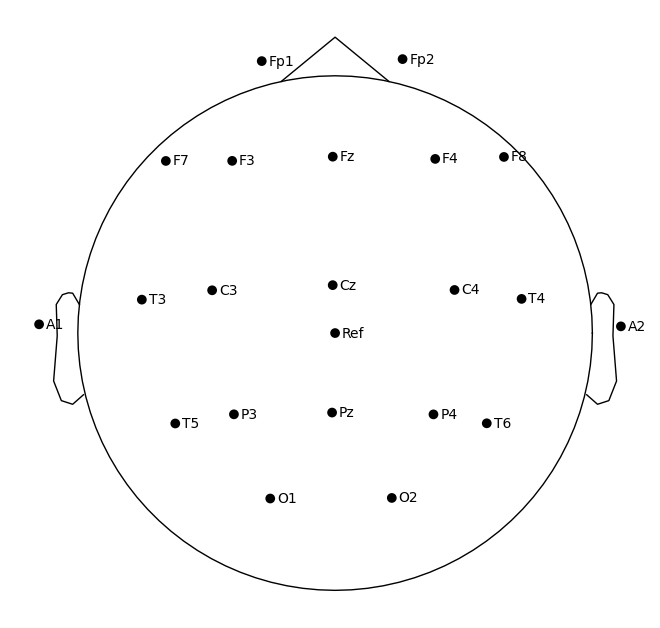

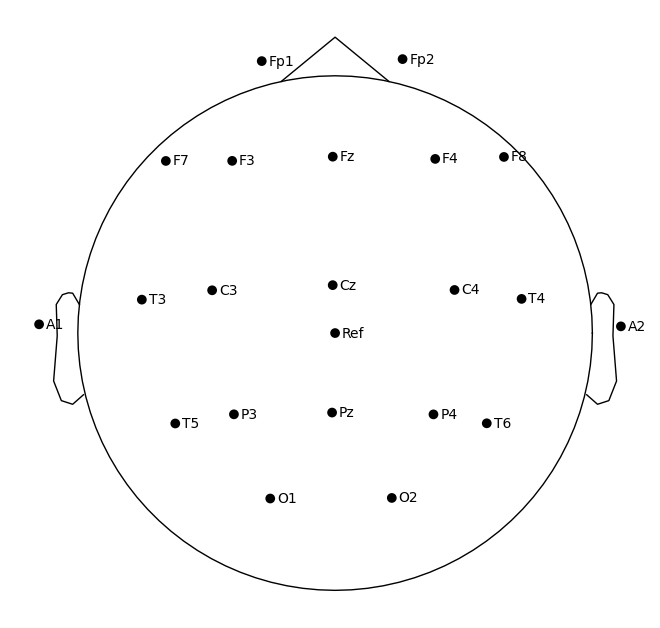

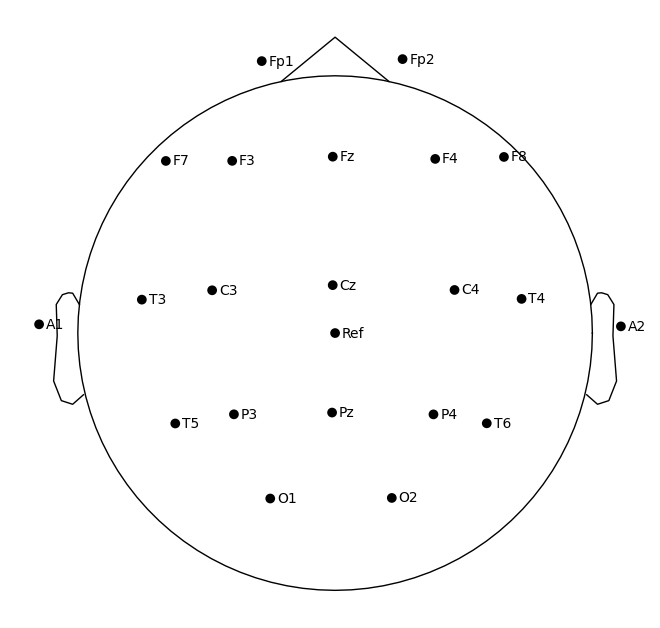

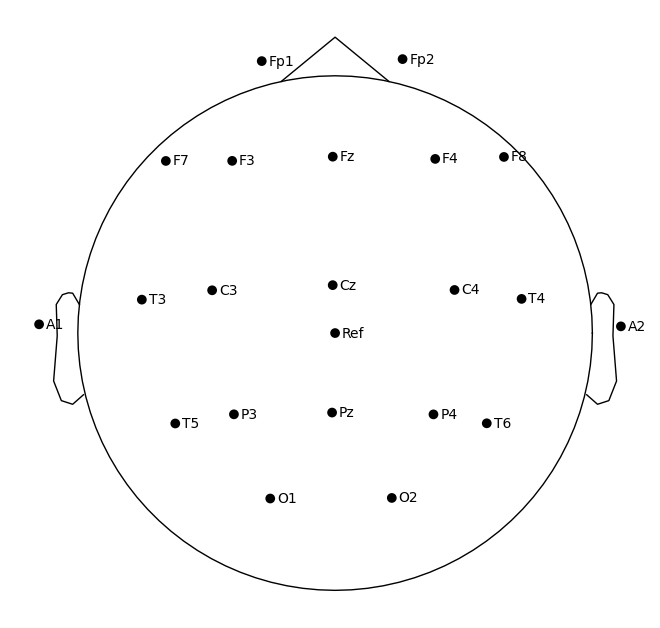

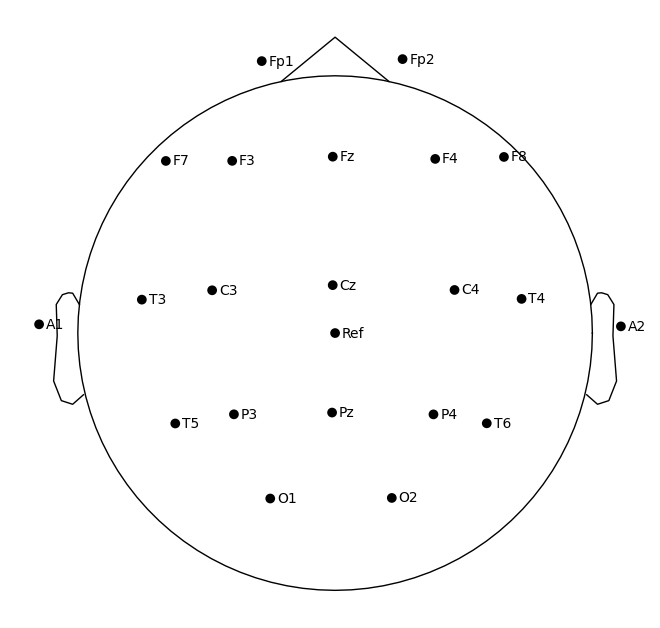

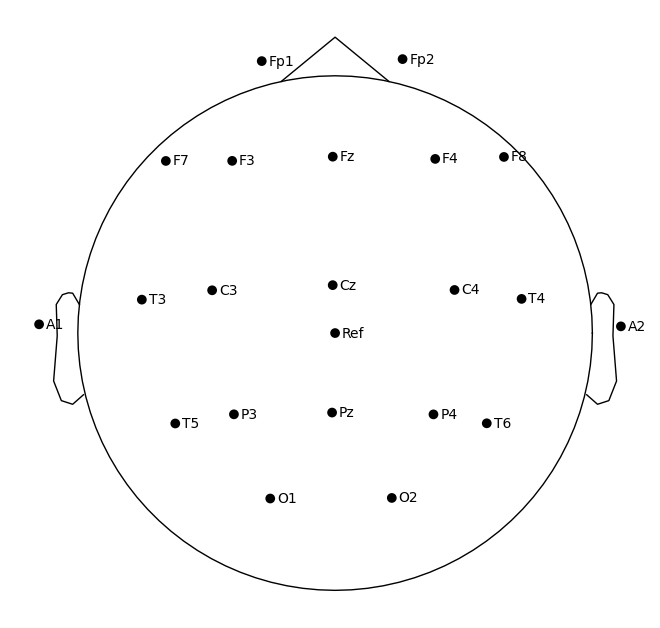

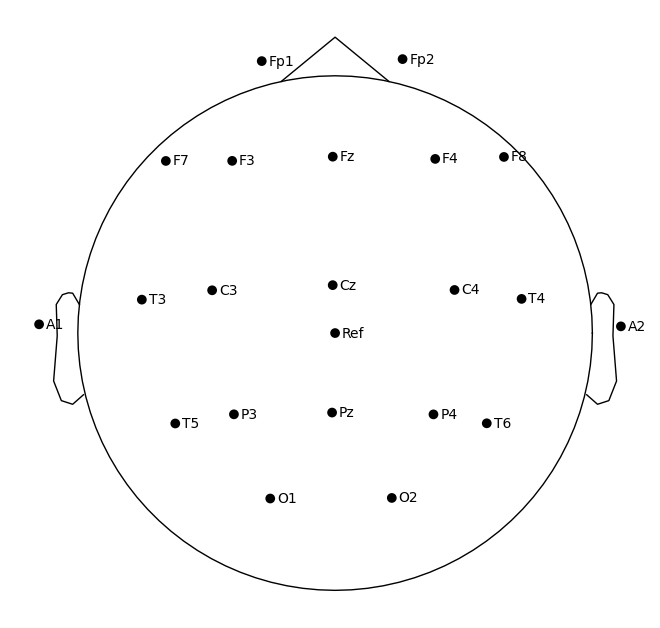

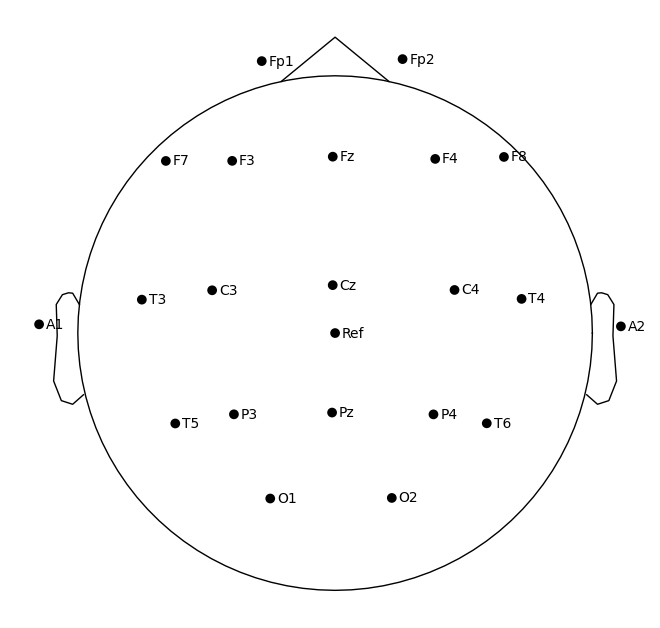

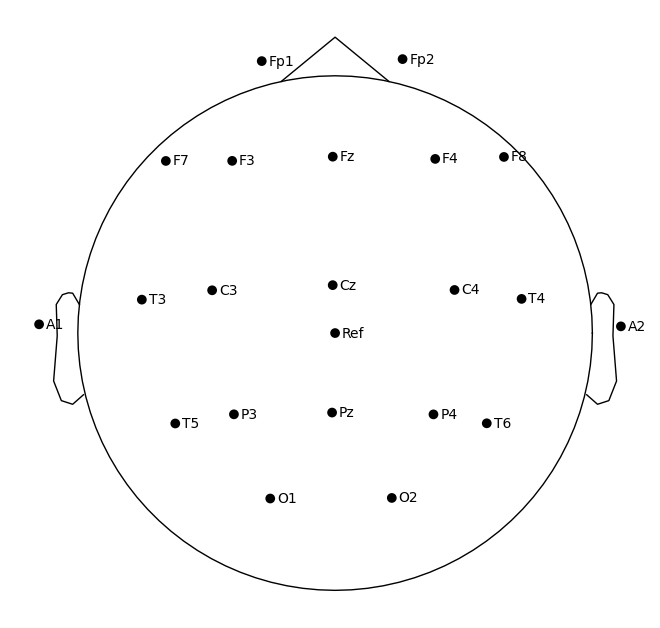

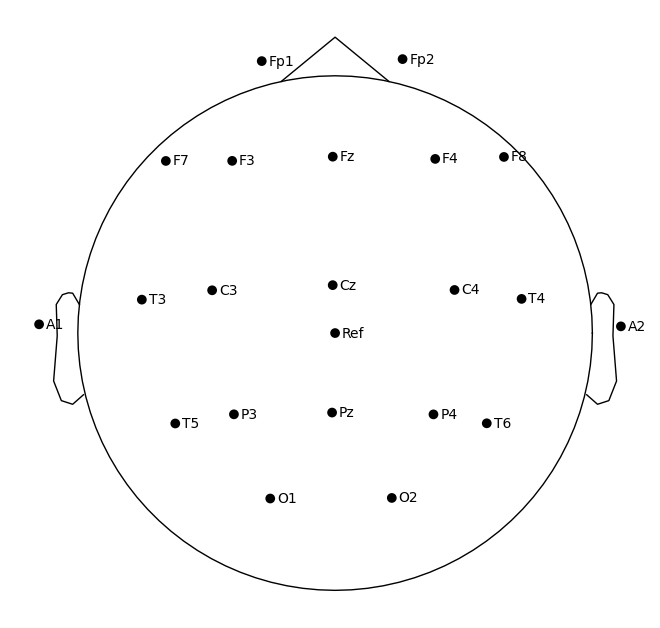

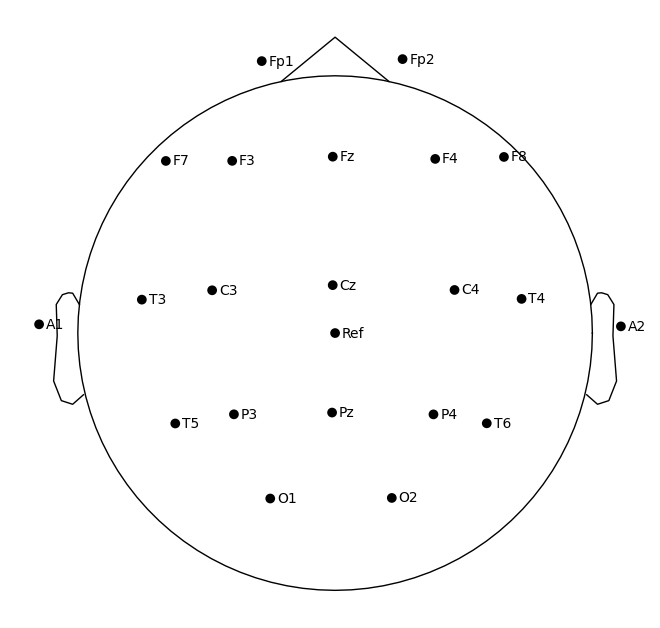

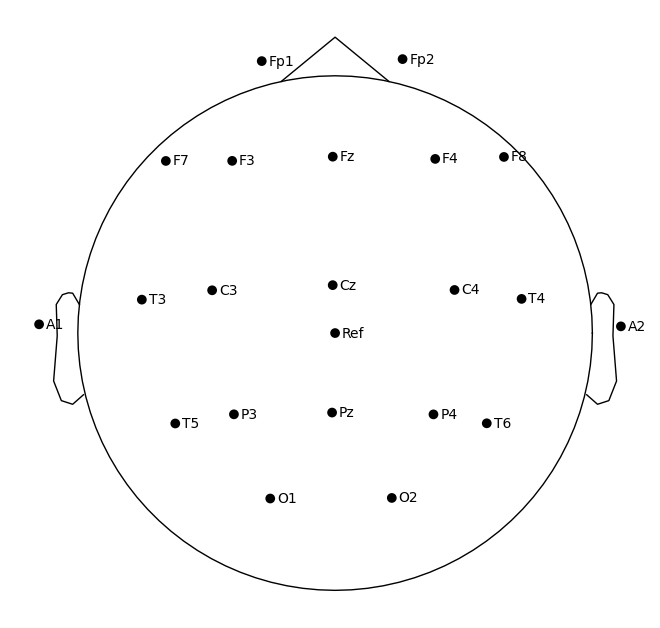

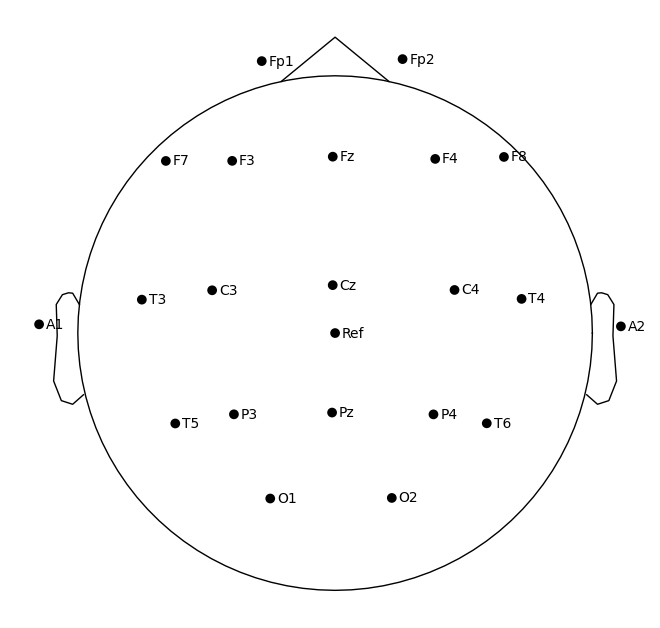

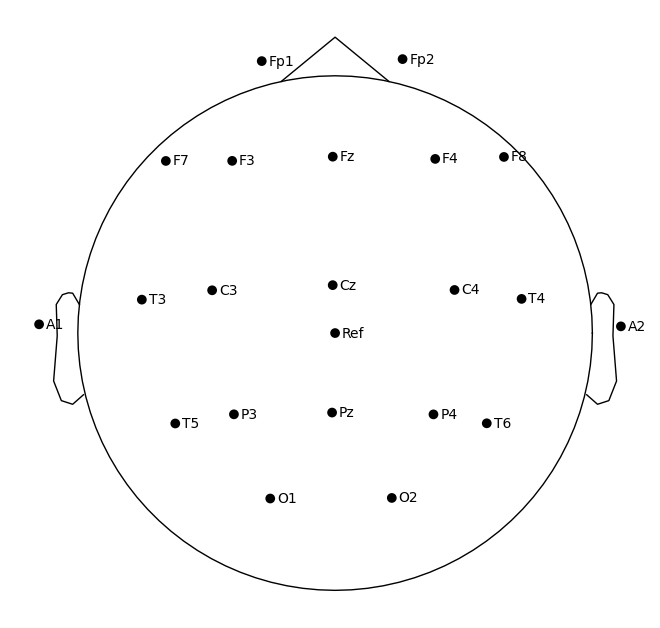

In [ ]:
for raw in raws:
  montage = mne.channels.make_standard_montage("standard_1020")

  b=raw.set_montage(montage, on_missing = 'ignore')
  raw.plot_sensors(show_names=True)

In [ ]:
# Filtering
raws_filtered = list()
p_number = 1
for i in range(p_number):
    raw_to_filter = raws[i]
    # high-pass filter on 1 Hz
    raw_to_filter = raw_to_filter.filter(l_freq=1., h_freq=None, phase='zero')
    # low-pass filter on 40 Hz
    raw_to_filter = raw_to_filter.filter(l_freq=None, h_freq=40., phase='zero')

    raws_filtered.append(raw_to_filter)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 83 samples (0.332 s)



[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.9s finished


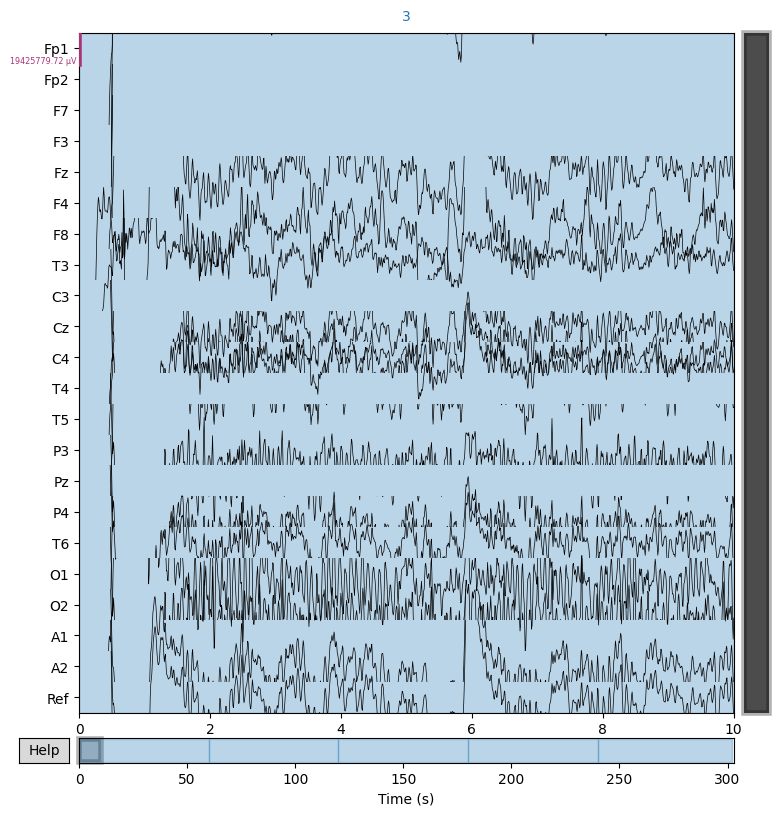

In [ ]:
for i in range(p_number):
    raws_filtered[i].plot(n_channels=22,  title=listFiles[i], scalings="auto")

In [ ]:
# Interpolating bad channels
for i in range(p_number):
    raws_filtered[i].interpolate_bads()

<ipython-input-124-9e8283ce526f>:3: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raws_filtered[i].interpolate_bads()


In [ ]:
icas = list()

for i in range(p_number):
    ica = ICA(n_components=10, random_state=97)
    ica.fit(raws_filtered[i].pick_types(eeg=True))
    icas.append(ica)
    print(f'{listFiles[i]}: ICA calculation done.')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 3.5s.
08.edf: ICA calculation done.


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


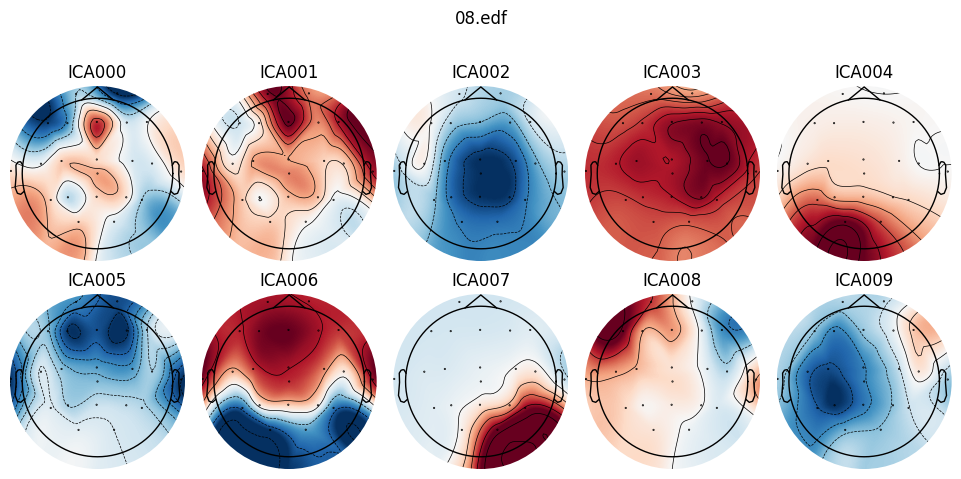

In [ ]:
for i in range(p_number):
    raws_filtered[i].montage = mne.channels.make_standard_montage('standard_1020')
    icas[i].plot_components(picks=range(10), inst=raws_filtered[i].pick_types(eeg=True), title=listFiles[i])
    plt.show()

In [ ]:
# ICA: third step
order = 2
for i in range(p_number):
    icas[i].exclude
    icas[i].apply(raws_filtered[i])
    icas[i].save(os.path.join(f'{listFiles[i]}_ICA_{order}.fif'), overwrite=True)

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Overwriting existing file.
Writing ICA solution to /content/drive/MyDrive/EEG_results_video/08.edf_ICA_2.fif...


<ipython-input-127-0679ed927a8f>:6: RuntimeWarning: This filename (08.edf_ICA_2.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  icas[i].save(os.path.join(f'{listFiles[i]}_ICA_{order}.fif'), overwrite=True)


In [ ]:
icas

[<ICA | raw data decomposition, method: fastica (fit in 31 iterations on 75750 samples), 10 ICA components (22 PCA components available), channel types: eeg, no sources marked for exclusion>]

In [ ]:
# Re-referencing
raws_referenced = list()

for i in range(p_number):
    raw_referenced = raws_filtered[i].set_eeg_reference(ref_channels='average', ch_type='eeg')
    raws_referenced.append(raw_referenced)

Applying average reference.
Applying a custom ('EEG',) reference.


In [ ]:
n_channels = 22
sampling_freq = 200  # in Hz
info = mne.create_info(n_channels, sfreq=sampling_freq)

In [ ]:
data_eeg=[]

In [ ]:
events

[(array([[    0,     0,     1],
         [15000,     0,     1],
         [30000,     0,     1],
         [45000,     0,     1],
         [60000,     0,     1]]),
  {'3': 1}),
 (array([[    0,     0,     1],
         [15000,     0,     1],
         [30000,     0,     1],
         [45000,     0,     1],
         [60000,     0,     1]]),
  {'3': 1}),
 (array([[    0,     0,     1],
         [15000,     0,     1],
         [30000,     0,     1],
         [45000,     0,     1],
         [60000,     0,     1]]),
  {'3': 1}),
 (array([[    0,     0,     1],
         [15000,     0,     1],
         [30000,     0,     1],
         [45000,     0,     1],
         [60000,     0,     1]]),
  {'3': 1}),
 (array([[    0,     0,     1],
         [14940,     0,     1],
         [29880,     0,     1],
         [44820,     0,     1],
         [59760,     0,     1]]),
  {'3': 1}),
 (array([[    0,     0,     1],
         [15000,     0,     1],
         [30000,     0,     1],
         [45000,     0,     1

In [ ]:
label = 1
duration = 300
epochs_base = list()

# Epoching
for i in range(p_number):
    try:
        epoch = mne.Epochs(raws[i], events=events[i][0], event_id=label, tmin=-0.5, tmax=0.8, baseline=None)
        evoked = epoch.average()
        epochs_base.append(evoked)
    except ValueError:
        continue

for i in range(p_number):
  evoked = epochs_base[i].to_data_frame()
  print(evoked)
  evoked = evoked.iloc[:326, :22]
  evoked = evoked.values.reshape(22, 326)
  epochs_base[i] = mne.EvokedArray(evoked, info = info)

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
      time           Fp1           Fp2            F7            F3  \
0   -0.500  2.652339e+06  8.933128e+05  9.246869e+05  5.586976e+06   
1   -0.496  2.795639e+06  1.429146e+06  8.168322e+05  5.753762e+06   
2   -0.492  2.370858e+06  1.430481e+06  1.946913e+05  5.205039e+06   
3   -0.488  1.581072e+06  9.907351e+05 -5.154161e+05  4.214399e+06   
4   -0.484  7.051375e+05  3.292280e+05 -9.487954e+05  3.182346e+06   
..     ...           ...           ...           ...           ...   
321  0.784 -6.013082e+06 -6.441864e+06 -2.567031e+06 -1.247821e+06   
322  0.788 -5.918487e+06 -6.499667e+06 -2.983324e+06 -2.168660e+06   
323  0.792 -6.102699e+06 -6.605558e+06 -3.592669e+06 -2.997862e+06   
324  0.796 -6.554088e+06 -6.791701e+06 -4.142055e+06 -3.515972e+06   
325  0.800 -7.082790e+06 -7.016160e+06 -4.384

In [ ]:
#гранд авэреж
from mne.time_frequency import tfr_morlet

epochs_base1 = mne.grand_average(epochs_base, info)
#freqs = np.arange(3, 35, 7)  # define frequencies of interest
#n_cycles = freqs / 4.  # different number of cycle per frequency
#power = tfr_morlet(epochs_base1, freqs=freqs, n_cycles=n_cycles, use_fft=False,
                   #return_itc=False, decim=3, n_jobs=1, picks='misc')

base = epochs_base1.to_data_frame()

Identifying common channels ...


<ipython-input-134-f6f18f3fe97b>:4: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  epochs_base1 = mne.grand_average(epochs_base, info)


In [ ]:
base['0'].mean()

-58936.090172796095

In [ ]:
for i in range(0,22):
  base[str(i)] /= 10000

In [ ]:
for i in range(0,22):
  base[str(i)] *= 100

In [ ]:
response_eeg = base.to_numpy()

# Audio

In [ ]:
import librosa

audio_file = '/content/видео_проект_аудио.wav'
y, sr = librosa.load(audio_file)
fft = np.fft.fft(y)
magnitude = np.abs(fft)
freq = np.fft.fftfreq(len(y), 1/sr)
import pandas as pd

data = pd.DataFrame({'frequency': freq, 'magnitude': magnitude})

downsample_rate = int(sr/326)
data = data.iloc[::downsample_rate, :]

In [ ]:
data

,frequency,magnitude
0,0.000000,562.379714
67,0.222043,13.219520
134,0.444086,38.429311
201,0.666129,13.077163
268,0.888172,42.640550
...,...,...
6653167,-0.904743,22.314911
6653234,-0.682699,13.137710
6653301,-0.460656,20.804229
6653368,-0.238613,33.391361


In [ ]:
group_size = int(len(data)/325)
data = data.groupby(np.arange(len(data))//group_size).mean()

In [ ]:
data.to_csv('audio_new.csv')

In [ ]:
data

,frequency,magnitude
0,33.639520,70.368201
1,101.140602,171.998156
2,168.641684,569.103353
3,236.142766,637.406829
4,303.643848,502.292171
...,...,...
322,-281.012029,619.244993
323,-213.510947,587.555825
324,-146.009865,528.482522
325,-78.508783,47.110728


# mTRF

In [ ]:
!pip install git+https://github.com/powerfulbean/mTRFpy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/powerfulbean/mTRFpy.git to /tmp/pip-req-build-3a4qyrk0
  Running command git clone --filter=blob:none --quiet https://github.com/powerfulbean/mTRFpy.git /tmp/pip-req-build-3a4qyrk0
  Resolved https://github.com/powerfulbean/mTRFpy.git to commit 5e9f3086588f2361efcbd45d420ef51f13150efa
  Preparing metadata (setup.py) ... done
  Created wheel for mtrf: filename=mtrf-1.2.1-py3-none-any.whl size=17152 sha256=6f2e705380a12074e9da72d547b491a6360fd31a5e067d115e878f0859d35dab
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmay90pp/wheels/14/90/f0/ac7c5e632c7367abd41ac913474f0db5b7cbb2b04782b17c58
Successfully built mtrf


In [ ]:
!pip install mtrf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(len(data))
print(len(response_eeg))

327
326


In [ ]:
array_audio = np.array(data["frequency"].values)

In [ ]:
from mtrf.model import load_sample_data

stimulus, response, fs = array_audio[:326], response_eeg, 250

In [ ]:
from mtrf.model import TRF

fwd_trf = TRF(direction=1)
tmin, tmax = 0, 0.4  # range of time lag
fwd_trf.train(stimulus, response, fs, tmin, tmax, regularization=1000)

In [ ]:
prediction, r_fwd, mse_fwd = fwd_trf.predict(stimulus, response)
print(f"correlation between actual and predicted response: {r_fwd.round(3)}")

correlation between actual and predicted response: 0.554


In [ ]:
r_fwd

0.5543993564423159

In [ ]:
mse_fwd

41446.16135348362

In [ ]:
prediction

[array([[  0.83577828,  -7.41224182,  -5.82166333, ..., -12.06129394,
          -9.76034025,  -5.02840902],
        [  0.83356005,  -7.71121253,  -5.56490021, ..., -11.62868965,
         -11.33568587,  -5.50249342],
        [  0.83168356,  -8.35158738,  -5.21474614, ..., -10.71523976,
         -12.77258716,  -6.75454923],
        ...,
        [  1.05704522, -12.400368  , -16.44981574, ..., -22.52602003,
           2.24375182,   7.10273279],
        [  1.05176043, -12.35113227, -16.31409714, ..., -22.30923911,
           2.13548828,   7.00996486],
        [  1.04647563, -12.30189655, -16.17837854, ..., -22.09245818,
           2.02722475,   6.91719694]])]

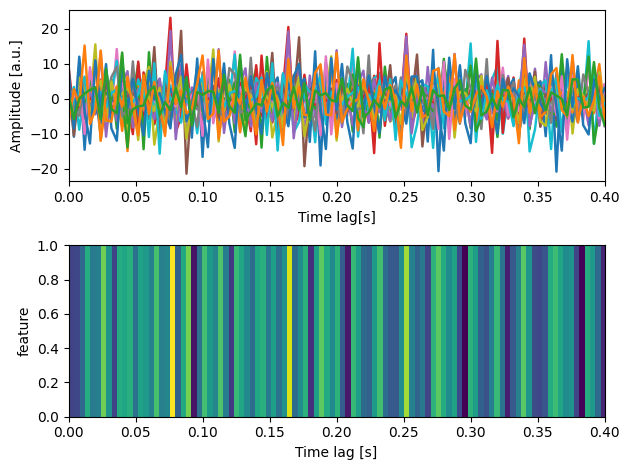

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2)
fwd_trf.plot(feature=0, axes=ax[0], show=False)
fwd_trf.plot(channel='gfp', axes=ax[1], kind='image', show=False)
plt.tight_layout()
plt.savefig('foo3.png')
plt.show()